<a href="https://colab.research.google.com/github/Maneekul/Senior/blob/main/Port_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Download and install TA-Lib library
url = 'https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files'
ext = '0.4.0-oneiric1_amd64.deb'
!wget $url/libta-lib0_$ext -qO libta.deb
!wget $url/ta-lib0-dev_$ext -qO ta.deb
!dpkg -i libta.deb ta.deb
!apt-get install -y -f
!pip install ta-lib


Selecting previously unselected package libta-lib0.
(Reading database ... 121654 files and directories currently installed.)
Preparing to unpack libta.deb ...
Unpacking libta-lib0 (0.4.0-oneiric1) ...
Selecting previously unselected package ta-lib0-dev.
Preparing to unpack ta.deb ...
Unpacking ta-lib0-dev (0.4.0-oneiric1) ...
Setting up libta-lib0 (0.4.0-oneiric1) ...
Setting up ta-lib0-dev (0.4.0-oneiric1) ...
Processing triggers for man-db (2.10.2-1) ...
Processing triggers for libc-bin (2.35-0ubuntu3.4) ...
/sbin/ldconfig.real: /usr/local/lib/libtbb.so.12 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbmalloc_proxy.so.2 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbbind_2_0.so.3 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbmalloc.so.2 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbbind.so.3 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbbind_2_5.so.3 is not a symbolic link

Reading packa

In [ ]:
import yfinance as yf
import talib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
#from ignite.handlers import EarlyStopping

from torch.utils.data import DataLoader, TensorDataset


In [ ]:
import yfinance as yf
import talib
import pandas as pd
import matplotlib.pyplot as plt

# Define the tickers
tickers = ["AAPL", "MSFT", "WMB"]

data = yf.download(tickers, start="2012-01-01", end="2024-01-04") # 2024-01-04  2023-01-01

macd_data = pd.DataFrame()
adx_data = pd.DataFrame()
band_data = pd.DataFrame()
trix_data = pd.DataFrame()
aroon_data = pd.DataFrame()
cci_data = pd.DataFrame()

for i, ticker in enumerate(tickers):
    high = data['High'][ticker]
    low = data['Low'][ticker]
    close = data['Close'][ticker]

    # Calculate MACD
    macd, signal_line, _ = talib.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)

    # Calculate ADX
    adx = talib.ADX(high, low, close, timeperiod=14)

    # Calculate Bollinger Bands
    _, middle_band, _ = talib.BBANDS(close, timeperiod=20, nbdevup=2, nbdevdn=2)

    # Calculate TRIX
    trix = talib.TRIX(close, timeperiod=30)   # timeperiod=30

    # Calculate Aroon Indicator
    aroon_up, aroon_down = talib.AROON(high, low, timeperiod=14)

    # Calculate CCI
    cci = talib.CCI(high, low, close, timeperiod=14)

    # Add values to the DataFrames
    macd_data[ticker + '_MACD'] = macd
    adx_data[ticker + '_ADX'] = adx
    band_data[ticker + '_BBANDS'] = middle_band
    trix_data[ticker + '_TRIX'] = trix
    aroon_data[ticker + '_AROON_UP'] = aroon_up
    aroon_data[ticker + '_AROON_DOWN'] = aroon_down
    cci_data[ticker + '_CCI'] = cci

macd_data.dropna(inplace=True)
adx_data.dropna(inplace=True)
band_data.dropna(inplace=True)
trix_data.dropna(inplace=True)
aroon_data.dropna(inplace=True)
cci_data.dropna(inplace=True)



[*********************100%%**********************]  3 of 3 completed


In [ ]:
import yfinance as yf
import talib
import pandas as pd
import matplotlib.pyplot as plt

# Define the tickers
tickers = ["AAPL", "MSFT", "WMB"]

data = yf.download(tickers, start="2012-01-01", end="2024-01-04") # 2024-01-04  2023-01-01

macd_data = pd.DataFrame()
adx_data = pd.DataFrame()
band_data = pd.DataFrame()
trix_data = pd.DataFrame()
aroon_data = pd.DataFrame()
cci_data = pd.DataFrame()

combine_aapl = pd.DataFrame()
combine_msft = pd.DataFrame()
combine_wmb = pd.DataFrame()



for i, ticker in enumerate(tickers):
    high = data['High'][ticker]
    low = data['Low'][ticker]
    close = data['Close'][ticker]

    # Calculate MACD
    macd, signal_line, _ = talib.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)

    # Calculate ADX
    adx = talib.ADX(high, low, close, timeperiod=14)

    # Calculate Bollinger Bands
    _, middle_band, _ = talib.BBANDS(close, timeperiod=20, nbdevup=2, nbdevdn=2)

    # Calculate TRIX
    trix = talib.TRIX(close, timeperiod=30)   # timeperiod=30

    # Calculate Aroon Indicator
    aroon_up, aroon_down = talib.AROON(high, low, timeperiod=14)

    # Calculate CCI
    cci = talib.CCI(high, low, close, timeperiod=14)

    # Add values to the DataFrames
    macd_data[ticker + '_MACD'] = macd
    adx_data[ticker + '_ADX'] = adx
    band_data[ticker + '_BBANDS'] = middle_band
    trix_data[ticker + '_TRIX'] = trix
    aroon_data[ticker + '_AROON_UP'] = aroon_up
    aroon_data[ticker + '_AROON_DOWN'] = aroon_down
    cci_data[ticker + '_CCI'] = cci

    combined_aapl = pd.concat([macd_data, adx_data, trix_data, trix_data, aroon_up - aroon_down, cci_data], axis=1)

macd_data.dropna(inplace=True)
adx_data.dropna(inplace=True)
band_data.dropna(inplace=True)
trix_data.dropna(inplace=True)
aroon_data.dropna(inplace=True)
cci_data.dropna(inplace=True)



[*********************100%%**********************]  3 of 3 completed


In [ ]:
import yfinance as yf
import talib
import pandas as pd

# Download data for three stocks
tickers = ["AAPL", "MSFT", "WMB"]
data = yf.download(tickers, start="2012-01-31", end="2024-01-11")

# Extract relevant columns for each stock
close_prices = data['Close']
high = data['High']
low = data['Low']

# Initialize an empty dictionary to store DataFrames for each stock
dfs = {}

# Calculate technical indicators for each stock
for ticker in tickers:
    close_prices_np = close_prices[ticker].to_numpy()
    macd, _, _ = talib.MACD(close_prices_np, fastperiod=12, slowperiod=26, signalperiod=9)
    tri_x = talib.TRIX(close_prices_np, timeperiod=14)
    adx = talib.ADX(high[ticker], low[ticker], close_prices_np, timeperiod=14)
    _, middle_band, _ = talib.BBANDS(close_prices_np, timeperiod=20, nbdevup=2, nbdevdn=2)
    aroon_up, aroon_down = talib.AROON(high[ticker], low[ticker], timeperiod=14)
    cci = talib.CCI(high[ticker], low[ticker], close_prices_np, timeperiod=14)

    # Create a DataFrame for the current stock
    df = pd.DataFrame({
        f"Close_{ticker}": close_prices[ticker],
        f"MACD_{ticker}": macd,
        f"TRIX_{ticker}": tri_x,
        f"ADX_{ticker}": adx,
        f"Middle_Band_{ticker}": middle_band,
        f"Aroon_Diff_{ticker}": aroon_up - aroon_down,
        f"CCI_{ticker}": cci
    })

    # Add the DataFrame to the dictionary
    dfs[ticker] = df

# Concatenate the DataFrames for all stocks
df_combined = pd.concat(list(dfs.values()), axis=1)

# Drop rows with NaN values
df_combined = df_combined.dropna()

# Display the combined DataFrame
df_combined



[*********************100%%**********************]  3 of 3 completed


,Close_AAPL,MACD_AAPL,TRIX_AAPL,ADX_AAPL,Middle_Band_AAPL,Aroon_Diff_AAPL,CCI_AAPL,Close_MSFT,MACD_MSFT,TRIX_MSFT,...,Middle_Band_MSFT,Aroon_Diff_MSFT,CCI_MSFT,Close_WMB,MACD_WMB,TRIX_WMB,ADX_WMB,Middle_Band_WMB,Aroon_Diff_WMB,CCI_WMB
Date,,,,,,,,,,,,,,,,,,,,,
2012-03-28,22.057858,1.039624,0.801123,64.674116,20.528143,-100.000000,107.628796,32.189999,0.356356,0.173637,...,32.195500,35.714286,2.775676,30.680000,0.357788,0.183115,14.852109,30.2850,-42.857143,48.217819
2012-03-29,21.780714,1.005606,0.789517,64.497201,20.644911,-92.857143,82.508755,32.119999,0.321019,0.163083,...,32.187000,35.714286,-63.404151,30.590000,0.340311,0.180878,14.434311,30.3015,-42.857143,6.397861
2012-03-30,21.412500,0.938121,0.768454,63.165384,20.742000,-85.714286,32.987416,32.259998,0.300843,0.152816,...,32.195999,35.714286,-20.446192,30.809999,0.340290,0.178782,15.036304,30.3290,-42.857143,78.590513
2012-04-02,22.093929,0.928916,0.748808,62.267189,20.894625,-78.571429,97.527738,32.290001,0.284001,0.143096,...,32.220500,35.714286,-16.842744,31.059999,0.356339,0.178431,15.595297,30.3645,-35.714286,68.179481
2012-04-03,22.475714,0.941574,0.733726,61.904887,21.071518,-100.000000,185.864495,31.940001,0.239648,0.131253,...,32.239500,85.714286,-87.500034,31.440001,0.395165,0.181801,16.428053,30.4505,-21.428571,89.548449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-04,181.910004,-0.702285,0.081086,27.024740,193.194002,92.857143,-194.721567,367.940002,1.286363,0.070338,...,372.240001,7.142857,-101.287373,35.820000,0.040056,-0.049012,16.593678,35.0820,-100.000000,196.010492
2024-01-05,181.179993,-1.345788,0.038491,28.212745,192.637001,100.000000,-146.963746,367.750000,0.839872,0.057820,...,372.187502,-71.428571,-129.849352,35.549999,0.052282,-0.036582,16.396513,35.0675,-85.714286,80.854864
2024-01-08,185.559998,-1.485219,0.001479,28.113569,192.201501,92.857143,-85.152235,374.690002,1.034105,0.049369,...,372.374501,-64.285714,16.336801,35.650002,0.069243,-0.024695,15.287265,35.1035,-85.714286,23.436780


In [ ]:
#tickers = ["AAPL", "MSFT", "WMB"]
tickers = ["MSFT"]
data = yf.download(tickers, start="2012-01-31", end="2024-01-11")
high = data['High']
low = data['Low']
close_prices = data['Close']

macd, _, _ = talib.MACD(close_prices, fastperiod=12, slowperiod=26, signalperiod=9)
tri_x = talib.TRIX(close_prices, timeperiod=14)
adx = talib.ADX(high, low, close_prices, timeperiod=14)
_, middle_band, _ = talib.BBANDS(close_prices, timeperiod=20, nbdevup=2, nbdevdn=2)
aroon_up, aroon_down = talib.AROON(high, low, timeperiod=14)
cci = talib.CCI(high, low, close_prices, timeperiod=14)

# Create DataFrames
df_close_prices = pd.DataFrame(close_prices, columns=["Close"])
df_macd = pd.DataFrame(macd, columns=["MACD"])
df_trix = pd.DataFrame(tri_x, columns=["TRIX"])
df_adx = pd.DataFrame(adx, columns=["ADX"])
df_middle_band = pd.DataFrame(middle_band, columns=["Middle Band"])
df_aroon_diff = pd.DataFrame(aroon_up - aroon_down, columns=["Aroon Diff"])  # Calculate the difference
df_cci = pd.DataFrame(cci, columns=["CCI"])

# Concatenate the data frames
test_aapl = pd.concat([df_close_prices,df_macd,
                       df_trix,
                       df_adx,
                       df_middle_band,
                       df_aroon_diff,
                       df_cci], axis=1)


# Drop rows with NaN values
test_aapl = test_aapl.dropna()



In [ ]:
tickers = ["AAPL", "MSFT", "WMB"]
#tickers = ["AAPL"]
data = yf.download(tickers, start="2012-01-31", end="2024-01-11")
high = data['High']
low = data['Low']
close_prices = data['Close']

macd, _, _ = talib.MACD(close_prices, fastperiod=12, slowperiod=26, signalperiod=9)
tri_x = talib.TRIX(close_prices, timeperiod=14)
adx = talib.ADX(high, low, close_prices, timeperiod=14)
_, middle_band, _ = talib.BBANDS(close_prices, timeperiod=20, nbdevup=2, nbdevdn=2)
aroon_up, aroon_down = talib.AROON(high, low, timeperiod=14)
cci = talib.CCI(high, low, close_prices, timeperiod=14)

# Create DataFrames
df_close_prices = pd.DataFrame(close_prices, columns=["Close"])
df_macd = pd.DataFrame(macd, columns=["MACD"])
df_trix = pd.DataFrame(tri_x, columns=["TRIX"])
df_adx = pd.DataFrame(adx, columns=["ADX"])
df_middle_band = pd.DataFrame(middle_band, columns=["Middle Band"])
df_aroon_diff = pd.DataFrame(aroon_up - aroon_down, columns=["Aroon Diff"])  # Calculate the difference
df_cci = pd.DataFrame(cci, columns=["CCI"])

# Concatenate the data frames
test_aapl = pd.concat([df_close_prices,df_macd,
                       df_trix,
                       df_adx,
                       df_middle_band,
                       df_aroon_diff,
                       df_cci], axis=1)


# Drop rows with NaN values
test_aapl = test_aapl.dropna()



[*********************100%%**********************]  1 of 1 completed


In [ ]:
test_aapl

,Close,MACD,TRIX,ADX,Middle Band,Aroon Diff,CCI
Date,,,,,,,
2012-03-28,22.057858,1.039624,0.801123,64.674116,20.528143,-100.000000,107.628796
2012-03-29,21.780714,1.005606,0.789517,64.497201,20.644911,-92.857143,82.508755
2012-03-30,21.412500,0.938121,0.768454,63.165384,20.742000,-85.714286,32.987416
2012-04-02,22.093929,0.928916,0.748808,62.267189,20.894625,-78.571429,97.527738
2012-04-03,22.475714,0.941574,0.733726,61.904887,21.071518,-100.000000,185.864495
...,...,...,...,...,...,...,...
2024-01-04,181.910004,-0.702285,0.081086,27.024740,193.194002,92.857143,-194.721567
2024-01-05,181.179993,-1.345788,0.038491,28.212745,192.637001,100.000000,-146.963746
2024-01-08,185.559998,-1.485219,0.001479,28.113569,192.201501,92.857143,-85.152235


In [ ]:
# Assuming you have the following variables from the previous calculation
my_money = 1_000_000
buy_price = 22.057858
min_num_shares = my_money // buy_price

# For the next buy transaction
next_buy_price = 23.50

# Calculate the value of the portfolio after the next buy transaction
portfolio_value_after_buying_next = my_money + (min_num_shares * (next_buy_price - buy_price))

# Print the result
print(f'Minimum Number of Shares: {min_num_shares}')
print(f'Portfolio Value after the next buy transaction: ${portfolio_value_after_buying_next:.2f}')


Minimum Number of Shares: 45335.0
Portfolio Value after the next buy transaction: $1065379.51


In [ ]:
# test Buy_And_Hold
my_money = 1_000_000
num_shares_bought = 45335.0
diff_price = 186.190002-22.057858

my_wallet = my_money + (num_shares_bought * diff_price)
print(my_wallet)

8440930.74824


# 10y_w/_port

In [ ]:
def wo_port_ADX(combined_df: pd.DataFrame) -> pd.DataFrame:
  buy = 0
  count_day = 0
  my_wallet = 0

  my_day = combined_df.index.values
  my_close = combined_df['Close'].values
  my_MACD = combined_df['MACD'].values
  my_TRIX = combined_df['TRIX'].values
  my_CCI = combined_df['CCI'].values
  my_ADX = combined_df['ADX'].values
  my_Middle_Band = combined_df['Middle Band'].values
  my_Aroon_Diff = combined_df['Aroon Diff'].values

  num = 0  ## Choose day or random day
  select_day = my_day[num]

  count_day = num
  #print("start_day = ",my_day[num])

  for i in range(combined_df.shape[0]-1):

    if num == (combined_df.shape[0]-1) or count_day == (combined_df.shape[0]-1) :  ## day still run
      print("my_money = ",my_wallet)
      break

    elif my_ADX[num] >= 25    :    #my_MACD[num]  #my_TRIX    my_Middle_Band[num] > my_close[num] or my_MACD[num]>0      my_MACD[num]>0 or  my_ADX[num] > 25
      buy = my_close[num]  ## ซื้อที่ราคาปิดเท่านี้
      count_day = count_day+1
      #print(count_day)

      if my_ADX[count_day] <= 25   : ## จะขายถ้าเป้น -   my_Middle_Band[count_day] < my_close[count_day] or my_MACD[count_day]<0   my_MACD[count_day] < 0 or my_ADX[count_day] < 25
        next_buy = my_close[count_day]
        diff_price = next_buy - buy
        my_wallet =  my_wallet +diff_price

        #print('date_to_buy',my_day[num])
        #print('date_to_sell',my_day[count_day])
        #print('buy_price =', buy)
        #print('sell =', next_buy)
        #print('diff_price =',diff_price)
        #print('my_wallet =',my_wallet)
        #print('\n')

        num = count_day
      else:
        #print("indicator still = +")
        pass

    else:
      num = num + 1
      count_day = num
  print('my_wallet_adx =',my_wallet)


In [ ]:
def wo_port_MACD(combined_df: pd.DataFrame) -> pd.DataFrame:
  buy = 0
  count_day = 0
  my_wallet = 0

  my_day = combined_df.index.values
  my_close = combined_df['Close'].values
  my_MACD = combined_df['MACD'].values
  my_TRIX = combined_df['TRIX'].values
  my_CCI = combined_df['CCI'].values
  my_ADX = combined_df['ADX'].values
  my_Middle_Band = combined_df['Middle Band'].values
  my_Aroon_Diff = combined_df['Aroon Diff'].values

  num = 0  ## Choose day or random day
  select_day = my_day[num]

  count_day = num
  #print("start_day = ",my_day[num])

  for i in range(combined_df.shape[0]-1):

    if num == (combined_df.shape[0]-1) or count_day == (combined_df.shape[0]-1) :  ## day still run
      print("my_money = ",my_wallet)
      break

    elif my_MACD[num] > 0:
      buy = my_close[num]  ## ซื้อที่ราคาปิดเท่านี้
      count_day = count_day+1
      #print(count_day)

      if my_MACD[count_day] < 0: ## จะขายถ้าเป้น -
        next_buy = my_close[count_day]
        diff_price = next_buy - buy
        my_wallet =  my_wallet +diff_price

        #print('date_to_buy',my_day[num])
        #print('date_to_sell',my_day[count_day])
        #print('buy_price =', buy)
        #print('sell =', next_buy)
        #print('diff_price =',diff_price)
        #print('my_wallet =',my_wallet)
        #print('\n')

        num = count_day
      else:
        #print("indicator still = +")
        pass

    else:
      num = num + 1
      count_day = num
  print('my_wallet_macd =',my_wallet)

In [ ]:
def wo_port_TRIX(combined_df: pd.DataFrame) -> pd.DataFrame:
  buy = 0
  count_day = 0
  my_wallet = 0

  my_day = combined_df.index.values
  my_close = combined_df['Close'].values
  my_MACD = combined_df['MACD'].values
  my_TRIX = combined_df['TRIX'].values
  my_CCI = combined_df['CCI'].values
  my_ADX = combined_df['ADX'].values
  my_Middle_Band = combined_df['Middle Band'].values
  my_Aroon_Diff = combined_df['Aroon Diff'].values

  num = 0  ## Choose day or random day
  select_day = my_day[num]

  count_day = num
  #print("start_day = ",my_day[num])

  for i in range(combined_df.shape[0]-1):

    if num == (combined_df.shape[0]-1) or count_day == (combined_df.shape[0]-1) :  ## day still run
      print("my_money = ",my_wallet)
      break

    elif my_TRIX[num] > 0:
      buy = my_close[num]  ## ซื้อที่ราคาปิดเท่านี้
      count_day = count_day+1
      #print(count_day)

      if my_TRIX[count_day] < 0: ## จะขายถ้าเป้น -
        next_buy = my_close[count_day]
        diff_price = next_buy - buy
        my_wallet =  my_wallet +diff_price

        #print('date_to_buy',my_day[num])
        #print('date_to_sell',my_day[count_day])
        #print('buy_price =', buy)
        #print('sell =', next_buy)
        #print('diff_price =',diff_price)
        #print('my_wallet =',my_wallet)
        #print('\n')

        num = count_day
      else:
        #print("indicator still = +")
        pass

    else:
      num = num + 1
      count_day = num
  print('my_wallet_trix =',my_wallet)

In [ ]:
def wo_port_CCI(combined_df: pd.DataFrame) -> pd.DataFrame:
  buy = 0
  count_day = 0
  my_wallet = 0

  my_day = combined_df.index.values
  my_close = combined_df['Close'].values
  my_MACD = combined_df['MACD'].values
  my_TRIX = combined_df['TRIX'].values
  my_CCI = combined_df['CCI'].values
  my_ADX = combined_df['ADX'].values
  my_Middle_Band = combined_df['Middle Band'].values
  my_Aroon_Diff = combined_df['Aroon Diff'].values

  num = 0  ## Choose day or random day
  select_day = my_day[num]

  count_day = num
  #print("start_day = ",my_day[num])

  for i in range(combined_df.shape[0]-1):

    if num == (combined_df.shape[0]-1) or count_day == (combined_df.shape[0]-1) :  ## day still run
      print("my_money = ",my_wallet)
      break

    elif my_CCI[num] > 0:
      buy = my_close[num]  ## ซื้อที่ราคาปิดเท่านี้
      count_day = count_day+1
      #print(count_day)

      if my_CCI[count_day] < 0: ## จะขายถ้าเป้น -
        next_buy = my_close[count_day]
        diff_price = next_buy - buy
        my_wallet =  my_wallet +diff_price

        #print('date_to_buy',my_day[num])
        #print('date_to_sell',my_day[count_day])
        #print('buy_price =', buy)
        #print('sell =', next_buy)
        #print('diff_price =',diff_price)
        #print('my_wallet =',my_wallet)
        #print('\n')

        num = count_day
      else:
        #print("indicator still = +")
        pass

    else:
      num = num + 1
      count_day = num
  print('my_wallet_cci =',my_wallet)

In [ ]:
def wo_port_Middle_Band(combined_df: pd.DataFrame) -> pd.DataFrame:
  buy = 0
  count_day = 0
  my_wallet = 0

  my_day = combined_df.index.values
  my_close = combined_df['Close'].values
  my_MACD = combined_df['MACD'].values
  my_TRIX = combined_df['TRIX'].values
  my_CCI = combined_df['CCI'].values
  my_ADX = combined_df['ADX'].values
  my_Middle_Band = combined_df['Middle Band'].values
  my_Aroon_Diff = combined_df['Aroon Diff'].values

  num = 0  ## Choose day or random day
  select_day = my_day[num]

  count_day = num
  #print("start_day = ",my_day[num])

  for i in range(combined_df.shape[0]-1):

    if num == (combined_df.shape[0]-1) or count_day == (combined_df.shape[0]-1) :  ## day still run
      print("my_money = ",my_wallet)
      break

    elif my_Middle_Band[num] > my_close[num]:
      buy = my_close[num]  ## ซื้อที่ราคาปิดเท่านี้
      count_day = count_day+1
      #print(count_day)

      if my_Middle_Band[count_day] < my_close[count_day]: ## จะขายถ้าเป้น -
        next_buy = my_close[count_day]
        diff_price = next_buy - buy
        my_wallet =  my_wallet +diff_price

        #print('date_to_buy',my_day[num])
        #print('date_to_sell',my_day[count_day])
        #print('buy_price =', buy)
        #print('sell =', next_buy)
        #print('diff_price =',diff_price)
        #print('my_wallet =',my_wallet)
        #print('\n')

        num = count_day
      else:
        #print("indicator still = +")
        pass

    else:
      num = num + 1
      count_day = num
  print('my_wallet_BB =',my_wallet)

In [ ]:
def wo_port_Aroon_Diff(combined_df: pd.DataFrame) -> pd.DataFrame:
  buy = 0
  count_day = 0
  my_wallet = 0

  my_day = combined_df.index.values
  my_close = combined_df['Close'].values
  my_MACD = combined_df['MACD'].values
  my_TRIX = combined_df['TRIX'].values
  my_CCI = combined_df['CCI'].values
  my_ADX = combined_df['ADX'].values
  my_Middle_Band = combined_df['Middle Band'].values
  my_Aroon_Diff = combined_df['Aroon Diff'].values

  num = 0  ## Choose day or random day
  select_day = my_day[num]

  count_day = num
  #print("start_day = ",my_day[num])

  for i in range(combined_df.shape[0]-1):

    if num == (combined_df.shape[0]-1) or count_day == (combined_df.shape[0]-1) :  ## day still run
      print("my_money = ",my_wallet)
      break

    elif my_Aroon_Diff[num] > 0:
      buy = my_close[num]  ## ซื้อที่ราคาปิดเท่านี้
      count_day = count_day+1
      #print(count_day)

      if my_Aroon_Diff[count_day] < 0: ## จะขายถ้าเป้น -
        next_buy = my_close[count_day]
        diff_price = next_buy - buy
        my_wallet =  my_wallet + diff_price

        #print('date_to_buy',my_day[num])
        #print('date_to_sell',my_day[count_day])
        #print('buy_price =', buy)
        #print('sell =', next_buy)
        #print('diff_price =',diff_price)
        #print('my_wallet =',my_wallet)
        #print('\n')

        num = count_day
      else:
        #print("indicator still = +")
        pass

    else:
      num = num + 1
      count_day = num
  print('my_wallet_aroon=',my_wallet)

In [ ]:
###########
wo_port_ADX(test_aapl)
wo_port_MACD(test_aapl)
wo_port_TRIX(test_aapl)
wo_port_CCI(test_aapl)
wo_port_Middle_Band(test_aapl)
wo_port_Aroon_Diff(test_aapl)

my_wallet_adx = 140.03106021881104
my_wallet_macd = 100.11427211761475
my_wallet_trix = 102.7471170425415
my_wallet_cci = 135.94788360595703
my_wallet_BB = -12.622891426086426
my_wallet_aroon= -9.737174034118652


# 10y_w_port

In [ ]:
def FN_many_indicator_corr(combined_df: pd.DataFrame) -> pd.DataFrame:
    buy = 0
    count_day = 0
    my_wallet_values = []
    my_date_sell = []
    my_wallet = 1_000_000  # initial_cash 1_000_000
    num_shares_bought = 1000

    my_day = combined_df.index.values
    my_close = combined_df['Close'].values
    my_MACD = combined_df['MACD'].values
    my_TRIX = combined_df['TRIX'].values
    my_ADX = combined_df['ADX'].values

    num = 0  # Choose day or random day --> This case choose first day
    select_day = my_day[num]

    count_day = num
    print("start_day = ", my_day[num])

    for i in range(combined_df.shape[0] - 1):
        if num == (combined_df.shape[0] - 1) or count_day == (combined_df.shape[0] - 1):  # day still run
            print("my_money = ", my_wallet)
            break

        elif my_TRIX[num] > 0 :   #my_ADX[num] > 25 or my_TRIX[num] > 0
            buy = my_close[num]  # ซื้อที่ราคาปิดเท่านี้
            count_day = count_day + 1

            if my_TRIX[count_day] < 0:  # จะขายถ้าเป้น -
                next_buy = my_close[count_day]  # sell
                diff_price = next_buy - buy
                my_wallet = my_wallet + (num_shares_bought * diff_price)
                my_x = my_day[count_day]

                my_date_sell.append(my_x)
                my_wallet_values.append(my_wallet)

                print('date_to_buy',my_day[num])
                print('date_to_sell',my_day[count_day])
                print('buy_price =', buy)
                print('sell =', next_buy)
                print('diff_price =',diff_price)
                print("my_port =",my_wallet)
                #print('my_wallet =',my_wallet)
                print('\n')
                num = count_day
            else:
                pass

        else:
            num = num + 1
            count_day = num

    # Plotting the my_wallet values over time
    print(my_date_sell)

    plt.plot(my_date_sell, my_wallet_values, label='My Wallet')
    plt.xlabel('Date')
    plt.ylabel('Portfolio Value')
    plt.title('Portfolio Value Over Time')
    plt.legend()
    plt.show()

#################################################################################################################################################################################################
#################################################################################################################################################################################################




In [ ]:
FN_many_indicator_corr(test_aapl)


start_day =  2012-03-28T00:00:00.000000000
date_to_buy 2012-03-28T00:00:00.000000000
date_to_sell 2012-05-10T00:00:00.000000000
buy_price = 22.057857513427734
sell = 20.375713348388672
diff_price = -1.6821441650390625
my_wallet = -1.6821441650390625


date_to_buy 2012-05-16T00:00:00.000000000
date_to_sell 2012-05-24T00:00:00.000000000
buy_price = 19.502857208251953
sell = 20.190000534057617
diff_price = 0.6871433258056641
my_wallet = -0.9950008392333984


date_to_buy 2012-08-17T00:00:00.000000000
date_to_sell 2012-09-27T00:00:00.000000000
buy_price = 23.146785736083984
sell = 24.332857131958008
diff_price = 1.1860713958740234
my_wallet = 0.191070556640625


date_to_buy 2012-10-11T00:00:00.000000000
date_to_sell 2013-03-28T00:00:00.000000000
buy_price = 22.43214225769043
sell = 15.809286117553711
diff_price = -6.622856140136719
my_wallet = -6.431785583496094


date_to_buy 2013-04-05T00:00:00.000000000
date_to_sell 2013-04-10T00:00:00.000000000
buy_price = 15.114286422729492
sell = 15.56

start_day =  2012-03-28T00:00:00.000000000
date_to_buy 2012-05-04T00:00:00.000000000
date_to_sell 2012-05-04T00:00:00.000000000
buy_price = 22.057857513427734
sell = 20.1875
diff_price = -1.8703575134277344
my_port = 998129.6424865723


date_to_buy 2012-10-10T00:00:00.000000000
date_to_sell 2012-10-10T00:00:00.000000000
buy_price = 20.97892951965332
sell = 22.8896427154541
diff_price = 1.9107131958007812
my_port = 1000040.355682373


date_to_buy 2013-06-18T00:00:00.000000000
date_to_sell 2013-06-18T00:00:00.000000000
buy_price = 16.56571388244629
sell = 15.420356750488281
diff_price = -1.1453571319580078
my_port = 998894.998550415


date_to_buy 2013-09-20T00:00:00.000000000
date_to_sell 2013-09-20T00:00:00.000000000
buy_price = 15.660714149475098
sell = 16.693214416503906
diff_price = 1.0325002670288086
my_port = 999927.4988174438


date_to_buy 2014-01-14T00:00:00.000000000
date_to_sell 2014-01-14T00:00:00.000000000
buy_price = 17.41964340209961
sell = 19.51392936706543
diff_price = 2.

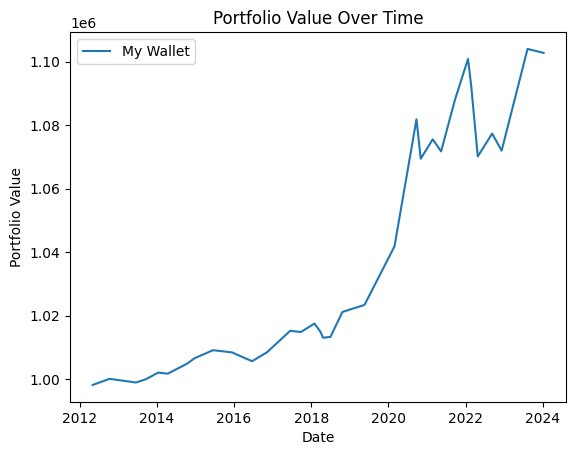

In [ ]:
FN_many_indicator_corr(test_aapl)

In [ ]:
#other_num_shares(test_aapl)


In [ ]:
# test Buy_And_Hold
my_money = 1_000_000
num_shares_bought = 100
diff_price = 186.190002-22.057858

my_wallet = my_money + (num_shares_bought * diff_price)
print(my_wallet)

1016413.2143999999


In [ ]:
initial_cash = 1_000_000  # Initial cash in your portfolio
buy_price_aapl = 340  # Buy price of AAPL
sell_price_aapl =  310   # Sell price of AAPL  20.27

# Calculate the number of AAPL shares you can buy with the initial cash
num_shares_bought = 100
#num_shares_bought = initial_cash // buy_price_aapl


# Calculate the value of your portfolio after buying AAPL shares
portfolio_value_after_buying = initial_cash + (num_shares_bought * (sell_price_aapl-buy_price_aapl))
portfolio_value_buying = initial_cash + (num_shares_bought * (buy_price_aapl))
portfolio_value_selling = initial_cash + (num_shares_bought * (sell_price_aapl))


print(f'Number of AAPL shares bought: {num_shares_bought}')
print(f'Portfolio value after buying AAPL: ${portfolio_value_after_buying:.2f}')
print("portfolio_value_buying =",portfolio_value_buying)
print("portfolio_value_selling =",portfolio_value_selling)
print(portfolio_value_selling-portfolio_value_buying)

Number of AAPL shares bought: 100
Portfolio value after buying AAPL: $997000.00
portfolio_value_buying = 1034000
portfolio_value_selling = 1031000
-3000
